<a href="https://colab.research.google.com/github/Pokemon-Catcher/pandasHomework/blob/master/Copy_of_04_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
colab = True 
if colab:
    from google.colab import drive
    drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/house_prices.csv.gz', index_col='Id')
else:
    df = pd.read_csv('../../data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
assert df.shape == (1460, 80)

In [0]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.r`u/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

Kurtosis: 6.509812011089439


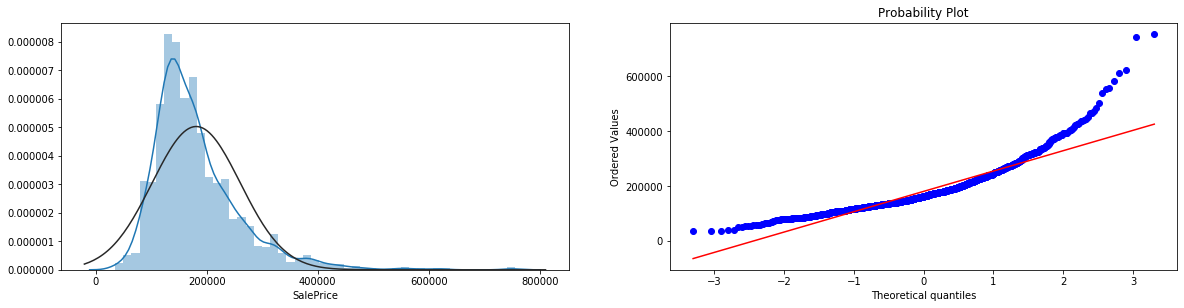

In [0]:
import scipy
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.distplot(df.SalePrice, fit=scipy.stats.norm)
plt.subplot(222)
scipy.stats.probplot(df.SalePrice, plot=plt)
print("Kurtosis:", scipy.stats.kurtosis(df.SalePrice))

Правый хвост распределения длиннее левого, то есть распределение ассиметрично,  что не очень хорошо, но у признака только один пик в распределении, что есть очень хорошо. 

## 1.2 Анализ некоторых зависимостей (3 балла)
`
У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

In [10]:
import plotly.express as px
import plotly.graph_objects as go

u=np.sort(df.YearBuilt.unique())
N=len(df.YearBuilt.unique())

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour.
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
fig = go.Figure(data=[go.Box(y=df[df.YearBuilt==u[i]].SalePrice, name=str(u[i]), marker_color=c[i],xaxis='x1',yaxis='y1') for i in range(N)])
fig.add_histogram(y=df.SalePrice, marker=dict(color='#1f77b4', opacity=0.7), xaxis='x2', name='Sale Price histogram')
fig.add_histogram(x=df.YearBuilt, marker=dict(color='#1f77b4', opacity=0.7), yaxis='y2', name='Year Built histogram')
# format the layout
fig.update_layout(
    title=dict(text='Sale Price/Year Built'),
    xaxis=dict(domain=[0, 0.9],title=dict(text="Year Built"),showgrid=True, zeroline=False, showticklabels=True),
    yaxis=dict(domain=[0, 0.9],title=dict(text="Sale Price"),zeroline=True, gridcolor='white'),
    xaxis2=dict(domain=[0.9, 1], showgrid=False, zeroline=False, showticklabels=False),
    yaxis2=dict(domain=[0.9, 1], showgrid=False, zeroline=False, showticklabels=False),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
    showlegend=False,
)

fig.show()
#fig = px.box(df, x="YearBuilt", y="SalePrice", color=c, points="all")

In [0]:
#fig = px.box(df, x="OverallQual", y="SalePrice", color=px.colors.qualitative.plotly points="all")
u=np.sort(df.OverallQual.unique())
N=len(df.OverallQual.unique())

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
fig = go.Figure(data=[go.Box(y=df[df.OverallQual==u[i]].SalePrice, name=str(u[i]), marker_color=c[i],boxpoints="all") for i in range(N)])
fig.add_histogram(x=df.OverallQual, marker=dict(color='#1f77b4', opacity=0.7), yaxis='y2', name='Overall Quality histogram')
# format the layout
fig.update_layout(
    title=dict(text='Sale Price/Overall Quality'),
    xaxis=dict(title=dict(text="Overall Quality"),showgrid=True, zeroline=False, showticklabels=True),
    yaxis=dict(domain=[0, 0.9],title=dict(text="Sale Price"),zeroline=True, gridcolor='white'),
    yaxis2=dict(domain=[0.9, 1], showgrid=False, zeroline=False,  showticklabels=False),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
    showlegend=False,
)

fig.show()

In [0]:
#sns.jointplot(x="LotArea", y="SalePrice", data=df)
#fig = px.box(df, x="OverallQual", y="SalePrice", points="all")
fig = px.scatter(df, x="LotArea", y="SalePrice", color= "OverallQual", trendline='ols', marginal_x='histogram', marginal_y='histogram')

fig.update_layout(
    title=dict(text='Lot Area/Sale Price'),
    xaxis=dict(domain=[0,0.9],title=dict(text="Lot Area"),showgrid=True, zeroline=False, showticklabels=True),
    yaxis=dict(title=dict(text="Sale Price"),zeroline=True, gridcolor='white'),
    xaxis2=dict(domain=[0.9,1]),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

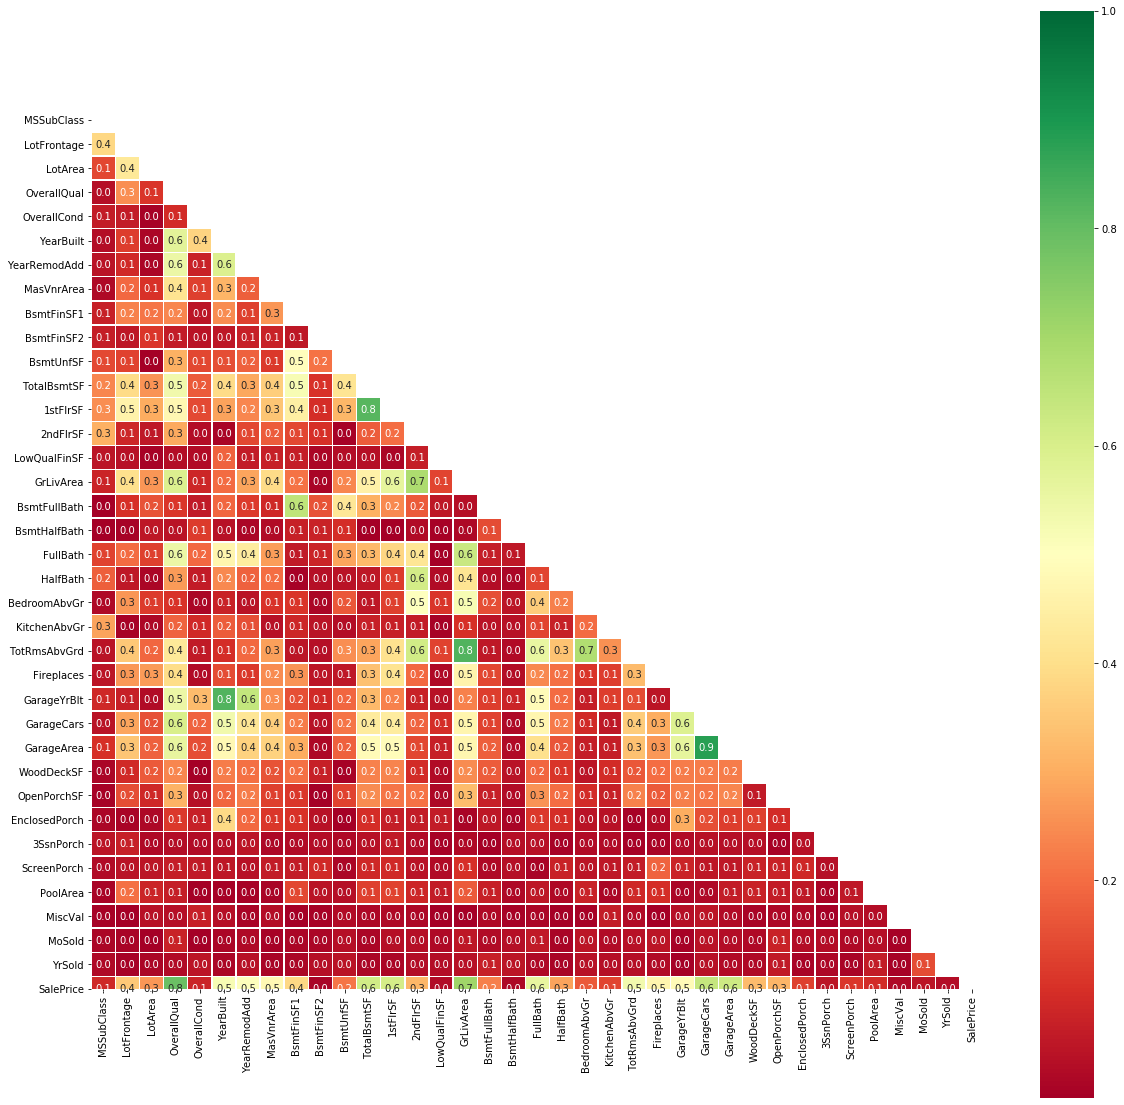

In [75]:
corr = np.abs(df.corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,cmap=plt.cm.RdYlGn, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

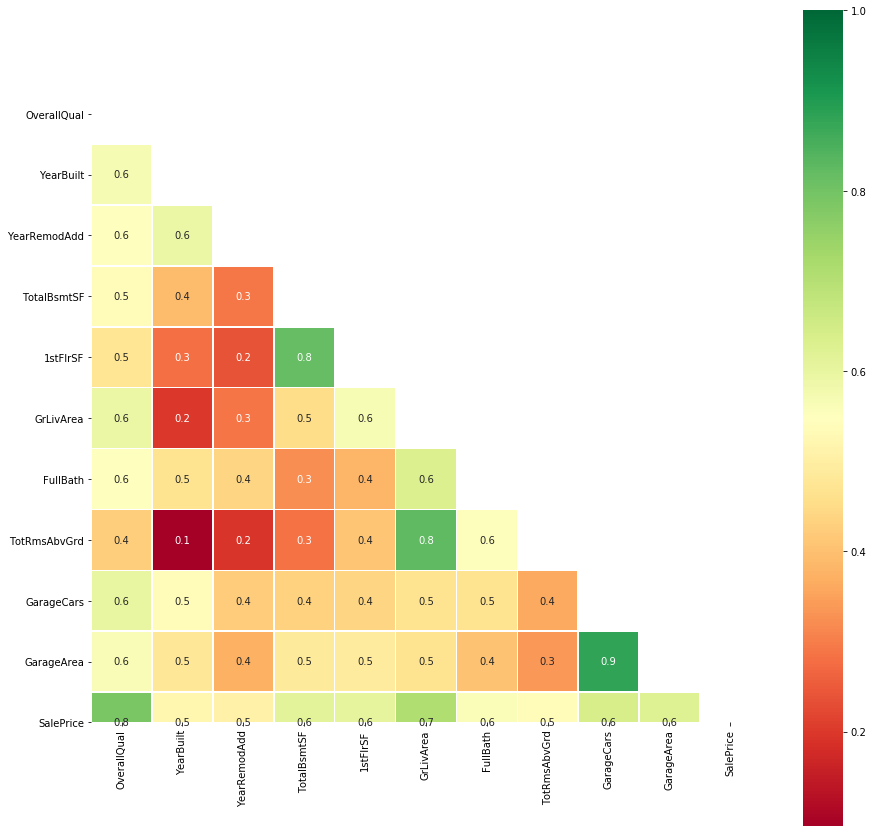

In [76]:
targetCorr=corr['SalePrice']
targetCorr=targetCorr[targetCorr>0.5]
corr2=corr.loc[targetCorr.index,targetCorr.index]

mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr2,cmap=plt.cm.RdYlGn, square=True,linewidths=.5, mask=mask2,annot=True, fmt=".1f")


## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [4]:
df2=df.fillna(value=-1)
df2=df2[df2==-1].sum()*-1
print("NA sum:\n",df2[df2>0])
part=(df2[df2>0]/df.apply(len))
print("\nMissing values parts:\n", part.dropna())
features=part[(part<=0.1) | part.isna()].index
df2=df[features]
featuresNa=part[part<=0.1].index
objects=df2[featuresNa].select_dtypes(include=np.object)
numbers=df2[featuresNa].select_dtypes(include=np.float64)
df2.loc[:,objects.columns]=df2.loc[:,objects.columns].fillna(value='unknown')
df2.loc[:,numbers.columns]=df2.loc[:,numbers.columns].fillna(df2[numbers.columns].mean())
print('\nIs there any NA? :', df2.isna().any().any())

NA sum:
 LotFrontage      259.0
Alley           1369.0
MasVnrType         8.0
MasVnrArea         8.0
BsmtQual          37.0
BsmtCond          37.0
BsmtExposure      38.0
BsmtFinType1      37.0
BsmtFinType2      38.0
Electrical         1.0
FireplaceQu      690.0
GarageType        81.0
GarageYrBlt       81.0
GarageFinish      81.0
GarageQual        81.0
GarageCond        81.0
PoolQC          1453.0
Fence           1179.0
MiscFeature     1406.0
dtype: float64

Missing values parts:
 Alley           0.937671
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
BsmtQual        0.025342
Electrical      0.000685
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
MasVnrArea      0.005479
MasVnrType      0.005479
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

Is there any NA? : False

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [5]:
df2=pd.get_dummies(df2)
print('There is ', len(df2.columns), ' features')

There is  281  features


In [0]:
X=df2.drop('SalePrice',axis=1)
y=df2['SalePrice']

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sys
np.set_printoptions(threshold=sys.maxsize)
reg = LinearRegression().fit(X, y)
coef=reg.coef_
coef.sort()
display(list(map(lambda x: round(x, 2),coef)))
print(cross_val_score(reg, X, y, cv=5,scoring='neg_mean_squared_error'))  

[-5773332911809.86,
 -5773332911800.8,
 -5773332911791.1,
 -5140840383.09,
 -5140836937.22,
 -5140828922.5,
 -5140824968.39,
 -5140819318.6,
 -4680576013.81,
 -4680562973.28,
 -4680560238.4,
 -4680557604.51,
 -4680556981.38,
 -4680550700.29,
 -4680546827.16,
 -3045653565.28,
 -3045653500.21,
 -3045650005.59,
 -3045649785.15,
 -3045647032.82,
 -2530664109.21,
 -2530621096.06,
 -2530613591.56,
 -1699292155.54,
 -1699290419.89,
 -1699288589.38,
 -1699287191.79,
 -1668005525.35,
 -1550235293.79,
 -1550128428.98,
 -1550127416.46,
 -1550125429.09,
 -1550123507.71,
 -1506101845.42,
 -1506096140.79,
 -1506095988.79,
 -1506092951.8,
 -1506083668.46,
 -1506004271.44,
 -1423193235.17,
 -1423187395.87,
 -1423185823.79,
 -1423181552.47,
 -1423168201.63,
 -1174481611.82,
 -1174480274.72,
 -1174477499.5,
 -1174475523.81,
 -1174474184.6,
 -1174473562.54,
 -1174470399.86,
 -1174470310.64,
 -1174469966.48,
 -1174469920.59,
 -1174469273.99,
 -1174467782.48,
 -1174466361.78,
 -1174464337.63,
 -1174463551.

[-9.37135732e+15 -8.43334872e+18 -4.27064182e+15 -1.76784144e+18
 -1.81851058e+18]


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [0]:
from sklearn import linear_model

divider=10
alphas=range(0,int(500/divider))
lassos = np.empty((len(X.columns),2,len(alphas)))
ridgos = np.empty((len(X.columns),2,len(alphas)))
for i in alphas:
  lasso = linear_model.Lasso(alpha=i)
  ridge = linear_model.Ridge(alpha=i)
  lassos[:,0,i]=np.array(lasso.fit(X,y).coef_)
  lassos[:,1,i]=np.full((len(X.columns)),i*divider)
  ridgos[:,0,i]=np.array(ridge.fit(X,y).coef_)
  ridgos[:,1,i]=np.full((len(X.columns)),i*divider)
  #lassos=np.append(lassos,)
  #ridgos=np.append(ridgos,ridge.fit(X,y).coef_)

In [11]:
fig = go.Figure()
for i in range(0,len(X.columns)):
  fig.add_trace(go.Scatter(x=lassos[i,1,:], y=lassos[i,0,:],
                    mode='lines+markers',
                    name=X.columns[i]))
  #plt.plot(lassos[i,1,:], lassos[i,0,:])
fig.show()

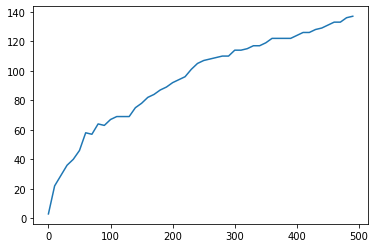

In [64]:
count_less=(lassos < 0.0001) & (lassos > -0.0001)
plt.plot(np.array(alphas)*10,[np.sum(count_less[:,0,i]) for i in range(0,len(alphas))])

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

209067.77468299225


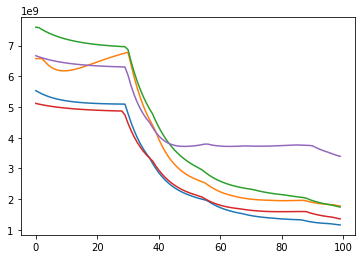

In [27]:
 from sklearn.linear_model import LassoCV
 reg = LassoCV(cv=5, random_state=0).fit(X, y)
 print(reg.alpha_)
plt.plot(reg.mse_path_)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

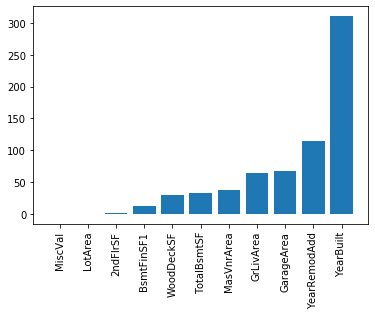

In [61]:
df3=pd.Series(reg.coef_, index=X.columns)
df3=df3[df3!=0].dropna()
df3=df3.sort_values()
plt.bar(df3.index,df3.values)
plt.xticks(rotation=90)

In [62]:
print(cross_val_score(reg, X, y, cv=5,scoring='neg_mean_squared_error'))  

[-1.15802721e+09 -1.73535478e+09 -1.72339887e+09 -1.39326008e+09
 -3.41895030e+09]


In [0]:
#Старая для сравнения: [-9.37135732e+15 -8.43334872e+18 -4.27064182e+15 -1.76784144e+18 -1.81851058e+18]

## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train shape:', X_train.shape, ' X_test shape:' , X_test.shape)

X_train shape: (978, 280)  X_test shape: (482, 280)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [0]:
reg2 = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
predicted=reg2.predict(X_test)

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

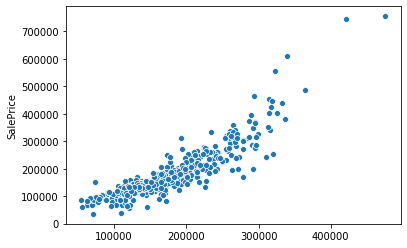

In [73]:
sns.scatterplot(predicted, y_test)

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [82]:
df4=df2[corr2.columns]
X2=df4.drop('SalePrice',axis=1)
y2=df4['SalePrice']

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
Id,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548
2,6,1976,1976,1262,1262,1262,2,6,2,460
3,7,2001,2002,920,920,1786,2,6,2,608
4,7,1915,1970,756,961,1717,1,7,3,642
5,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,953,953,1647,2,7,2,460
1457,6,1978,1988,1542,2073,2073,2,7,2,500
1458,7,1941,2006,1152,1188,2340,2,9,1,252


In [0]:
reg3=LassoCV(alphas=[1],cv=5).fit(X2,y2)


In [89]:
print(cross_val_score(reg, X2, y2, cv=5,scoring='neg_mean_squared_error')) 

[-1.20637277e+09 -1.65344981e+09 -1.77600434e+09 -1.30606918e+09
 -3.11580318e+09]


In [0]:
#Старая linear для сравнения: [-9.37135732e+15 -8.43334872e+18 -4.27064182e+15 -1.76784144e+18 -1.81851058e+18]
#Старая LassoCV для сравнения: [-1.15802721e+09 -1.73535478e+09 -1.72339887e+09 -1.39326008e+09 -3.41895030e+09]

Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.